In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\henry\Downloads\ICT FINAL ASSESMENT\train_ctrUa4K.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)


In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
freqgraph=dataset.select_dtypes(include='float')
freqgraph

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
...,...,...,...,...
609,0.0,71.0,360.0,1.0
610,0.0,40.0,180.0,1.0
611,240.0,253.0,360.0,1.0
612,0.0,187.0,360.0,1.0


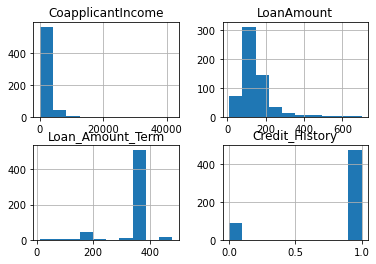

In [9]:
freqgraph.hist()
plt.show()

In [10]:
dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
num_cols=[ 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']

In [12]:
#filling null values
for i in num_cols:
    dataset[i]=dataset[i].fillna(dataset[i].median())

In [13]:
dataset.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#filling null values present in categorical features 
cat_cols=['Gender','Married','Dependents','Self_Employed']
for i in cat_cols:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [15]:
dataset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
dataset.duplicated().sum()


0

In [17]:
col=dataset.select_dtypes(include='object')
for i in col:
    print(i,' = ',dataset[i].unique())

Gender  =  ['Male' 'Female']
Married  =  ['No' 'Yes']
Dependents  =  ['0' '1' '2' '3+']
Education  =  ['Graduate' 'Not Graduate']
Self_Employed  =  ['No' 'Yes']
Property_Area  =  ['Urban' 'Rural' 'Semiurban']
Loan_Status  =  ['Y' 'N']


In [18]:
#LABEL Encoding Categorical Values

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()
for i in col:
   dataset[i]=label_enc.fit_transform(dataset[i])
dataset[i]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [19]:

for i in col:
    print(i,' = ',dataset[i].unique())

Gender  =  [1 0]
Married  =  [0 1]
Dependents  =  [0 1 2 3]
Education  =  [0 1]
Self_Employed  =  [0 1]
Property_Area  =  [2 0 1]
Loan_Status  =  [1 0]


In [20]:
dataset.corr()['Loan_Status']

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

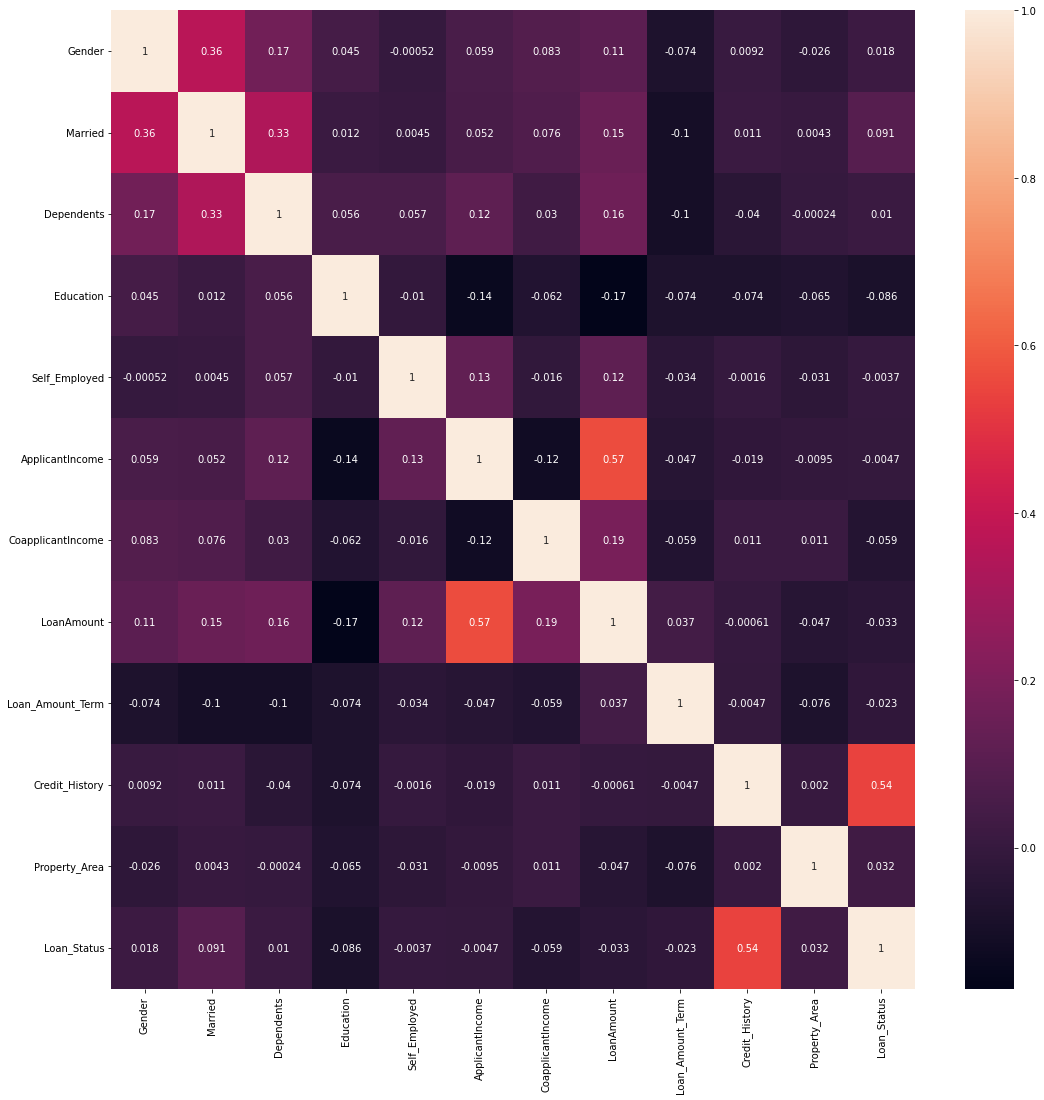

In [21]:
import seaborn as sns
plt.subplots(figsize=(18,18))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [22]:
#dataset.drop(['ApplicantIncome','Self_Employed','Dependents','LoanAmount'],axis=1,inplace=True)

In [23]:
#splitiing to target and features
x=dataset.drop(['Loan_Status'],axis=1)
y=dataset['Loan_Status']

In [24]:
#Splitiing data into testing and training set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [25]:
#Standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
#DEcision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)

y_pred_dt=dt.predict(x_test)

Accuracy is 0.6753246753246753
Precision is 0.7314814814814815
Recall is 0.79
f1 score is 0.7596153846153846


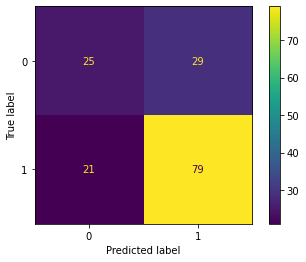

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
print('Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Precision is', precision_score(y_test, y_pred_dt))
print('Recall is', recall_score(y_test, y_pred_dt))
print('f1 score is', f1_score(y_test,y_pred_dt))
c_dt=confusion_matrix(y_test,y_pred_dt)
ConfusionMatrixDisplay(c_dt).plot()

In [28]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_logistic=lr.predict(x_test)

Test accuracy	=  0.7727272727272727
Test precision	=  0.8059318709833148
Test recall	=  0.7727272727272727
Test F1 score	=  0.7422274695001967


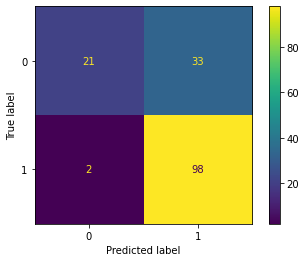

In [29]:
print('Test accuracy\t= ',accuracy_score(y_test, y_pred_logistic))
print('Test precision\t= ',precision_score(y_test, y_pred_logistic, average = 'weighted'))
print('Test recall\t= ',recall_score(y_test, y_pred_logistic, average = 'weighted'))
print('Test F1 score\t= ',f1_score(y_test, y_pred_logistic, average = 'weighted'))
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(cm_logistic).plot()

In [30]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=9, random_state=0)

In [31]:
y_pred_forest=clf.predict(x_test)

Test accuracy	=  0.7792207792207793
Test precision	=  0.8022758491508492
Test recall	=  0.7792207792207793
Test F1 score	=  0.7541410344041923


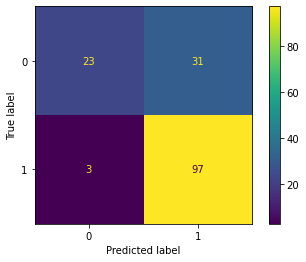

In [32]:
print('Test accuracy\t= ',accuracy_score(y_test, y_pred_forest))
print('Test precision\t= ',precision_score(y_test, y_pred_forest, average = 'weighted'))
print('Test recall\t= ',recall_score(y_test, y_pred_forest, average = 'weighted'))
print('Test F1 score\t= ',f1_score(y_test, y_pred_forest, average = 'weighted'))
cm_forest = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm_forest).plot()

In [33]:
dataset=pd.read_csv(r"C:\Users\henry\Downloads\ICT FINAL ASSESMENT\test_lAUu6dG.csv")

In [34]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)


In [35]:
dataset.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [37]:
freqgraph=dataset.select_dtypes(include='float')
freqgraph

,LoanAmount,Loan_Amount_Term,Credit_History
0,110.0,360.0,1.0
1,126.0,360.0,1.0
2,208.0,360.0,1.0
3,100.0,360.0,NaN
4,78.0,360.0,1.0
...,...,...,...
362,113.0,360.0,1.0
363,115.0,360.0,1.0
364,126.0,360.0,NaN
365,158.0,360.0,1.0


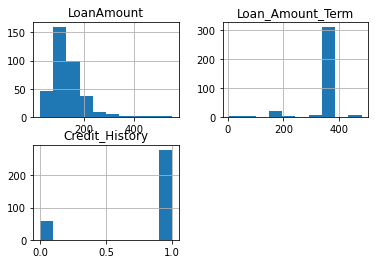

In [38]:
freqgraph.hist()
plt.show()

In [39]:
dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [40]:
num_cols=[ 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']

In [41]:
#filling null values
for i in num_cols:
    dataset[i]=dataset[i].fillna(dataset[i].median())

In [42]:
dataset.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [43]:
#filling null values present in categorical features 
cat_cols=['Gender','Married','Dependents','Self_Employed']
for i in cat_cols:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [44]:
dataset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
dataset.duplicated().sum()


1

In [46]:
col=dataset.select_dtypes(include='object')
for i in col:
    print(i,' = ',dataset[i].unique())

Gender  =  ['Male' 'Female']
Married  =  ['Yes' 'No']
Dependents  =  ['0' '1' '2' '3+']
Education  =  ['Graduate' 'Not Graduate']
Self_Employed  =  ['No' 'Yes']
Property_Area  =  ['Urban' 'Semiurban' 'Rural']


In [47]:
#LABEL Encoding Categorical Values

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()
for i in col:
   dataset[i]=label_enc.fit_transform(dataset[i])
dataset[i]

0      2
1      2
2      2
3      2
4      2
      ..
362    2
363    2
364    1
365    0
366    0
Name: Property_Area, Length: 367, dtype: int32

In [48]:

for i in col:
    print(i,' = ',dataset[i].unique())

Gender  =  [1 0]
Married  =  [1 0]
Dependents  =  [0 1 2 3]
Education  =  [0 1]
Self_Employed  =  [0 1]
Property_Area  =  [2 1 0]


In [49]:
dataset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [50]:
#dataset.drop(['ApplicantIncome','Self_Employed','Dependents','LoanAmount'],axis=1,inplace=True)

In [51]:

col=dataset.select_dtypes(include='object')
for i in col:
   dataset[i]=label_enc.fit_transform(dataset[i])

# output

In [52]:

output=clf.predict(dataset)
replacement_map = {0: 'N', 1: 'Y'}

output = np.vectorize(replacement_map.get)(output)


C:\Users\henry\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
output

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [54]:
samp= pd.read_csv(r"C:\Users\henry\Downloads\ICT FINAL ASSESMENT\sample_submission_49d68Cx.csv")
samp



,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [55]:
samp['Loan_Status'] = output

In [56]:
samp

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [57]:
samp.to_csv('sample_submission1.csv', index=False)

